<a href="https://colab.research.google.com/github/Technocoder7/DataScience/blob/main/SIA_2103_DATA_ANALYSIS_AND_SIMULATION_GROUP_ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#       **SIA 2013 DATA ANALYSIS AND SIMULATION GROUP ASSIGNMENT 2**

---




GROUP MEMBERS:
1. HADEBE SANELE            N02132677F
2. KHUMALO THANDEKA         N02132964E
3. PANDENI THANDEKA         N02126010N
4. MAKUMBE BOAZ             N02126854B
5. DUBE PRESUMPTION S       N02131379B
6. SIBANDA WILSON           N02132460D
7. MARAMBA ALLAN            N02124201T
8. ZENDA SAMANTHA G         N02126371F
9. NYOKA ISHEANOPA          N021

#### Question 2: For this exercise, you can find the data in datasets/algebradata.csv. Frank Mulligrew is the algebra coordinator for Washington, DC public schools. He is required by the school board to gather some statistics. Using the information about his class, calculate the following:
1. Percentage of students with a passing grade
2. Percentage of women with a passing grade
3. Average hours of study for all students
4. Average hours of study for students with a passing grade

In [24]:
#import the required molules or libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 


In [2]:
#Loading the dataset
url = 'https://raw.githubusercontent.com/Apress/learn-data-analysis-w-python/master/datasets/algebradata.csv'
data = pd.read_csv(url)

#Check if the data loaded successfully
data.head()

,Fname,Lname,Gender,Grade,Hours of Study
0,Mary,Ettienne,F,B,16
1,Charles,Looner,M,F,8
2,Betty,Franklin,F,A,24
3,Roger,Withers,M,C,5
4,John,Mulgrew,M,A,5


1. Percentage of students with a passing grade:

In [3]:
#Check the grade symbols available in the dataset
data['Grade'].unique()

array(['B', 'F', 'A', 'C', 'D'], dtype=object)

In [4]:
#First check if there are null values that can affect our calculations
data.isnull().sum()

#Claculating the percentage of those who passed
passed=data[~((data['Grade']== 'F') | (data['Grade']=='D'))].shape[0]
Total = data.shape[0]
passed_percentage = (passed/Total) * 100
print(f"The percentage of student with a passing grade is {round(passed_percentage, 2)}%")

The percentage of student with a passing grade is 69.17%


2. Percentage of women with a passing grade:

In [5]:
#check if different versions of the same gender are used eg M, male or Male, etc
data['Gender'].unique()

array(['F', 'M'], dtype=object)

In [6]:
#Now everything is perfect, so we'll proceed to calculate the number of women  with a passing grade in the dataset
iswoman = data['Gender'] == 'F'
passed = ~((data['Grade']== 'F') | (data['Grade']=='D'))
NumberOfwomen_Passed = data[ iswoman & passed].shape[0]
Totalwomen= data[iswoman].shape[0]
Passedwomen_Percentage = (NumberOfwomen_Passed/ Totalwomen) * 100
print(f"{round(Passedwomen_Percentage, 2)}% of the women have a passing grade.")


73.55% of the women have a passing grade.


3. Average hours of study for all students:

In [7]:
AverageStudyHours= data['Hours of Study'].mean()
print(f'Average hours of Study for all students is {round(AverageStudyHours, 2)}hrs')

Average hours of Study for all students is 15.12hrs


4. Average hours of study for students with a passing grade:

In [8]:
PassingGradeAvgStudyHours = data[passed]['Hours of Study'].mean()
print(f"Average hours of study for students with a passing grade is {round(PassingGradeAvgStudyHours, 2)}hrs.")

Average hours of study for students with a passing grade is 16.3hrs.


#### Question 3: You can find the data in the datasets/axisdata file. Carlos Hugens is the sales manager for Axis Auto Sales, a low-cost regional chain of used car lots. Carlos is getting ready for his annual sales meeting and is looking for the best way to improve his sales group’s performance. His data includes the gender, years of experience, sales training, and hours worked per week for each team member. It also includes the average cars sold per month by each salesperson. Find out the following:
1. Average cars sold per month
2. Max cars sold per month
3. Min cars sold per month
4. Average cars sold per month by gender
5. Average hours worked by people selling more than three cars per month
6. Average years of experience
7. Average years of experience for people selling more than three cars per month
8. Average cars sold per month sorted by whether they have had sales training
9. What do you think is the best indicator of whether someone is a good salesperson or not?

In [9]:
#Loading the dataset and checking if loading was successful
url= 'https://raw.githubusercontent.com/Apress/learn-data-analysis-w-python/master/datasets/axisdata.csv'
data = pd.read_csv(url)
data.head()

,Fname,Lname,Gender,Hours Worked,SalesTraining,Years Experience,Cars Sold
0,Jada,Walters,F,39,N,3,2
1,Nicole,Henderson,F,46,N,3,6
2,Tanya,Moore,F,42,Y,4,6
3,Ronelle,Jackson,F,38,Y,5,3
4,Brad,Sears,M,33,N,4,2


1. Average cars sold per month:

In [10]:
#Add new column(Fullname)
Fullname = data['Fname'] + " " + data['Lname']
data['Fullname'] = Fullname
NumberOfSalesReps = len(data['Fullname'].unique())

AverageCarsSoldPerMonth= data['Cars Sold'].sum()/NumberOfSalesReps
print(f"The average number of cars sold per month is {round(AverageCarsSoldPerMonth)}")

The average number of cars sold per month is 6


2. Max cars sold per month

In [11]:
MaxCarsSoldPerMonth = data['Cars Sold'].max()
print(f"The maximum number of cars sold per month is {MaxCarsSoldPerMonth}")

The maximum number of cars sold per month is 7


3. Min cars sold per month

In [12]:
MinCarsSoldPerMonth = data['Cars Sold'].min()
print(f"The minimum number of cars sold per month is {MinCarsSoldPerMonth}")

The minimum number of cars sold per month is 1


4. Average cars sold per month by gender

In [13]:
isMale = data['Gender'] == 'M'
isFemale = data['Gender'] == 'F'
Females = data[isFemale]
Males = data[isMale]
MaleAvg = Males['Cars Sold'].sum()/len(Males['Fullname'].unique())
FemaleAvg = Females['Cars Sold'].sum()/len(Females['Fullname'].unique())
print(f"Average number of cars sold per month by Males is {round(MaleAvg)}, while the average number of cars cars sold by Females is {round(FemaleAvg)}")

Average number of cars sold per month by Males is 6, while the average number of cars cars sold by Females is 6


5. Average hours worked by people selling more than three cars per month

In [14]:
SoldMoreThanThree = data['Cars Sold'] > 3
MoreThanThreeData = data[SoldMoreThanThree]
AvgHrsWorkedPerMonth = (MoreThanThreeData['Hours Worked'].sum() * 52)/ 12
print(f"The Average hours worked by people selling more than three cars per month is {round(AvgHrsWorkedPerMonth,2)}hrs")

The Average hours worked by people selling more than three cars per month is 88668.67hrs


6. Average years of experience

In [15]:
AverageYearsOfExp = data['Years Experience'].mean()
print(f"The Average years of experience is approximately {round(AverageYearsOfExp)} years.")

The Average years of experience is approximately 3 years.


7. Average years of experience for people selling more than three cars per month

In [16]:

AvgYearsOfExp = MoreThanThreeData['Years Experience'].mean()
print(f"The Average years of experience is approximately {round(AvgYearsOfExp)} years.")

The Average years of experience is approximately 3 years.


8. Average cars sold per month sorted by whether they have had sales training

In [22]:
# For those with Training..
WithTraining = data['SalesTraining'] == 'Y'
AvgWithTraining = data[WithTraining]

AvgCarsSoldPerMonth= AvgWithTraining['Cars Sold'].sum()/NumberOfSalesReps
print(f"Average number of cars sold per month by those who had sales Training is  {round(AvgCarsSoldPerMonth)}")

WithoutTraining = data['SalesTraining'] == 'Y'
AvgWithoutTraining = data[WithoutTraining]

AvgCarsSoldPerMonth_Without= AvgWithoutTraining['Cars Sold'].sum()/NumberOfSalesReps
print(f"Average number of cars sold per month by those who does not have sales Training is  {round(AvgCarsSoldPerMonth_Without)}")

Average number of cars sold per month by those who had sales Training is  4
Average number of cars sold per month by those who does not have sales Training is  4


9. What do you think is the best indicator of whether someone is a good salesperson or not?

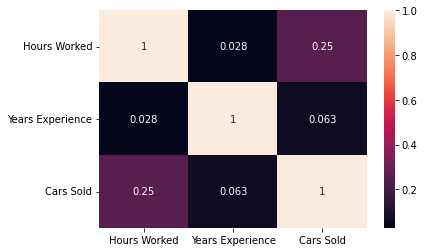

In [27]:
#Try correlation plot
CorrMatrix = data.corr()
sns.heatmap(CorrMatrix, annot=True)

From the above correlation plot, it is apparent that "Cars Sold" variable is positively correlated with the "Hours Worked" variable with a correlation coefficient of 0.25. Although the correlation is not strong enough, according to the dataset, the "Hours Worked" variable is the best indicator for someone being a good salesperson or not.